In [1]:
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
from sklearn import tree

# Enable inline plotting
%matplotlib inline

### Purpose
- Aid the developers and App Stores to correctly label the Apps for Content Rating.
- Also to recommend Content Rating for a new App.

#### Columns Used 
- **App Description** - An elaborate description of the app given by the App developers.
- **Category** - Category/genre of the app.
- **Content Rating** -  Content Rating of the App. For Ex: 4+, 12+,19+


In [2]:
iOSAppFilePath = r'C:\Users\kumar\OneDrive\Documents\Projects\Appomania\data\external\iOS\AppleStore.csv'
iOSDF = pd.read_csv(iOSAppFilePath)
iOSDF.head()


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [5]:
iOSDescFilePath = r'C:\Users\kumar\OneDrive\Documents\Projects\Appomania\data\external\iOS\appleStore_description.csv'
iOSDescDF = pd.read_csv(iOSDescFilePath)
iOSDescDF.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


In [6]:
iOSWDesDF = pd.merge(iOSDF,iOSDescDF,on=['id'],how='left')

In [7]:
iOSWDesDF.head()

,Unnamed: 0,id,track_name_x,size_bytes_x,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,track_name_y,size_bytes_y,app_desc
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,Bible,92774400,On more than 250 million devices around the wo...


#### Encode - Genres and Content Rating

In [8]:
from sklearn import preprocessing

genreLabel = preprocessing.LabelEncoder()
genreLabel.fit(iOSWDesDF["prime_genre"])

list(genreLabel.classes_)


['Book',
 'Business',
 'Catalogs',
 'Education',
 'Entertainment',
 'Finance',
 'Food & Drink',
 'Games',
 'Health & Fitness',
 'Lifestyle',
 'Medical',
 'Music',
 'Navigation',
 'News',
 'Photo & Video',
 'Productivity',
 'Reference',
 'Shopping',
 'Social Networking',
 'Sports',
 'Travel',
 'Utilities',
 'Weather']

In [9]:
iOSWDesDF["prime_genre"]= genreLabel.transform(iOSWDesDF["prime_genre"]) 

#list(le.inverse_transform([2, 2, 1]))

In [11]:
contentLabel = preprocessing.LabelEncoder()
contentLabel.fit(iOSWDesDF["cont_rating"])

list(contentLabel.classes_)

['12+', '17+', '4+', '9+']

In [12]:
iOSWDesDF["cont_rating"]= contentLabel.transform(iOSWDesDF["cont_rating"]) 
iOSWDesDF.head()


,Unnamed: 0,id,track_name_x,size_bytes_x,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,track_name_y,size_bytes_y,app_desc
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,2,7,38,5,10,1,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,2,15,37,5,23,1,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,2,22,37,5,3,1,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,0,17,37,5,9,1,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,2,16,37,5,45,1,Bible,92774400,On more than 250 million devices around the wo...


In [13]:
modelDF = iOSWDesDF.filter(['app_desc','prime_genre','cont_rating'], axis=1)
modelDF.head()

,app_desc,prime_genre,cont_rating
0,"SAVE 20%, now only $3.99 for a limited time!\n...",7,2
1,Let Evernote change the way you organize your ...,15,2
2,Download the most popular free weather app pow...,22,2
3,The eBay app is the best way to find anything ...,17,0
4,On more than 250 million devices around the wo...,16,2


In [ ]:
### Feature Engineeering - tf-idf Vectorization

In [14]:
# Feature Engineering
# Since Text cannot be used to classify, we find tfidf of all the Description
# Using this we will get the feature vectors, which then can be used to classify

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(modelDF.app_desc).toarray()
features.shape

(7197, 31411)

In [15]:
# Split Total Data into Train and Test
from sklearn.model_selection import train_test_split

modelDF = modelDF.dropna()

#App Description,Genre is the data and Content Rating is the Classification
testModelDF = modelDF.filter(['app_desc','prime_genre'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(testModelDF, modelDF.cont_rating, random_state=1)

In [40]:
from scipy import sparse
sparse.csr_matrix(features)


<7197x31411 sparse matrix of type '<class 'numpy.float64'>'
	with 908434 stored elements in Compressed Sparse Row format>

### Classification - Linear SVC

In [26]:
# Classification using Linear SVC


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train.app_desc)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [31]:
from scipy.sparse import hstack
import numpy as np
X_train_tfidf = hstack((X_train_tfidf,np.array(X_train['prime_genre'])[:,None]))

#X_train_tfidf.insert(loc=0, column='prime_genre', value=pd.Series(testModelDF.prime_genre))
# Run Training
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [32]:
count_vect.transform(X_test)

<2x77822 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [34]:
# Run Testing and print accuracy
primGenreTest = count_vect.transform(X_test.app_desc)
primGenreTest = hstack((primGenreTest,np.array(X_test['prime_genre'])[:,None]))

clf.score(primGenreTest, y_test)

0.6838888888888889

##### - Prediction Rate - 68.38%

### Classification - All Models

- Also uses Cross Validation

In [42]:
count_vectAll = CountVectorizer()
modelDFCounts = count_vect.fit_transform(modelDF.app_desc)
tfidf_transformerAll = TfidfTransformer()
X_train_tfidfAll = tfidf_transformerAll.fit_transform(modelDFCounts)
#X_train_tfidf['prime_genre'] = pd.Series(testModelDF.prime_genre)

X_train_tfidfAll = hstack((X_train_tfidfAll,np.array(modelDF['prime_genre'])[:,None]))

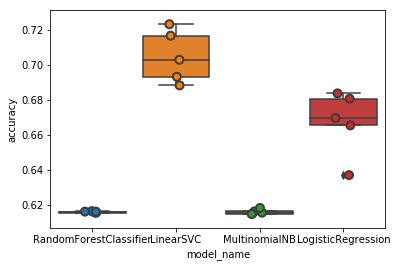

In [44]:

# Classification using 4 models
#   1)Random Forest 
#   2) Support Vector Machine
#   3)Naive Byes
#   4)Logistic Regression

# Cross Validation is used

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train_tfidfAll, modelDF.cont_rating, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [45]:
# Accuracies after Classification using cross validation for all models
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.615545
1,RandomForestClassifier,1,0.615545
2,RandomForestClassifier,2,0.616400
3,RandomForestClassifier,3,0.616134
4,RandomForestClassifier,4,0.616134
5,LinearSVC,0,0.688411
6,LinearSVC,1,0.716863
7,LinearSVC,2,0.723419
8,LinearSVC,3,0.703060
9,LinearSVC,4,0.693324


In [46]:
# Average accuracy for each model
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.705015
LogisticRegression        0.667371
MultinomialNB             0.615951
RandomForestClassifier    0.615951
Name: accuracy, dtype: float64

### Generated Data Set
- Randomly selected **31** recently released apps from Google Store.
- Retrieved its app description and corresponding genre.
- Predicted the genre of the apps using the trained Linear SVC model.
- Compared the results between the actual vs predicted.

In [48]:

newDesc = '''SHOW OFF YOUR SMARTS ** Challenge your friends and family to a trivia competition, and prove how smart you are!

TRAIN YOUR BRAIN ** Who says trivia isn't useful? You will keep your brain sharp with Trivia Crack 2. We have thousands of challenging trivia questions for you!

COLLECT CHARACTERS ** Collect our original characters to level up and win amazing prizes!

BECOME A TRIVIA EXPERT ** Answer questions in our 6 categories: Art, Science, History, Entertainment, Sport and Geography, and show how smart you are!

CREATE YOUR OWN TEAM ** Join a team of Trivia experts, or create your own and climb the rankings. Lots of prizes await!

FULLY RENOVATED GRAPHICS ** Enjoy our beautiful animations and environments, with sharper colors than ever!

KEY FEATURES
- Play with your friends and family 
- Sharpen your brain with thousands of challenging questions
- Join a team or create your own
- Exchange items with your friends
- Enjoy our fully renovated graphics!

TRIVIA CRACK 2 ALSO INCLUDES
- Hundreds of thousands of questions
- More than 20 languages
- Millions of active users to challenge
- User-created questions
- And loads of fun, completely free!

What are you waiting for? Download the game now and become the smartest in town!

===============

For more information, visit www.triviacrack.com
Have questions? Need troubleshooting? Find help at support.etermax.com

Join our community!

- Facebook: https://www.facebook.com/triviacrack
- Twitter: @triviacrack
- Instagram: https://instagram.com/triviacrack
- YouTube: https://www.youtube.com/c/triviacrack
- Google+: https://plus.google.com/+triviacrack'''


rslt = clf.predict(count_vect.transform([newDesc]))

ValueError: X has 95714 features per sample; expecting 77823

In [29]:
rslt[0]

7

In [30]:
le.inverse_transform(rslt[0])

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


'Games'

In [31]:
 from sklearn.calibration import CalibratedClassifierCV, calibration_curve
svm = LinearSVC()
 clf = CalibratedClassifierCV(svm) 
 clf.fit(X_train_tfidf, y_train)
 y_proba = clf.predict_proba(count_vect.transform(X_test))

In [33]:
newDesc1 = '''SHOW OFF YOUR SMARTS ** Challenge your friends and family to a trivia competition, and prove how smart you are!

TRAIN YOUR BRAIN ** Who says trivia isn't useful? You will keep your brain sharp with Trivia Crack 2. We have thousands of challenging trivia questions for you!

COLLECT CHARACTERS ** Collect our original characters to level up and win amazing prizes!

BECOME A TRIVIA EXPERT ** Answer questions in our 6 categories: Art, Science, History, Entertainment, Sport and Geography, and show how smart you are!

CREATE YOUR OWN TEAM ** Join a team of Trivia experts, or create your own and climb the rankings. Lots of prizes await!

FULLY RENOVATED GRAPHICS ** Enjoy our beautiful animations and environments, with sharper colors than ever!

KEY FEATURES
- Play with your friends and family 
- Sharpen your brain with thousands of challenging questions
- Join a team or create your own
- Exchange items with your friends
- Enjoy our fully renovated graphics!

TRIVIA CRACK 2 ALSO INCLUDES
- Hundreds of thousands of questions
- More than 20 languages
- Millions of active users to challenge
- User-created questions
- And loads of fun, completely free!

What are you waiting for? Download the game now and become the smartest in town!

===============

For more information, visit www.triviacrack.com
Have questions? Need troubleshooting? Find help at support.etermax.com

Join our community!

- Facebook: https://www.facebook.com/triviacrack
- Twitter: @triviacrack
- Instagram: https://instagram.com/triviacrack
- YouTube: https://www.youtube.com/c/triviacrack
- Google+: https://plus.google.com/+triviacrack'''


rslt = clf.predict_proba(count_vect.transform([newDesc]))

In [35]:
rslt*1000


array([[3.72906435e-18, 4.14420903e-06, 1.72628382e-04, 3.97570110e+02,
        5.40541129e-15, 4.19718764e-27, 8.45475345e-28, 5.64036722e+02,
        2.63303893e-04, 8.90438362e-20, 3.60710660e-04, 8.59923111e+00,
        1.90916632e-31, 2.29637427e-07, 2.95862530e+01, 2.06856400e-01,
        2.04776869e-29, 1.31053485e-15, 2.60710429e-05, 3.30808160e-36,
        2.35031325e-33, 4.67934534e-18, 1.24057911e-18]])